# **Comparación de Órbitas de Basura Espacial bajo diferentes campos gravitacionales**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

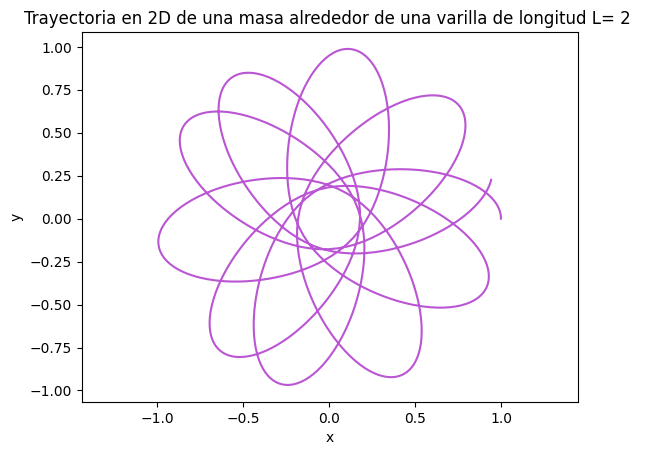

<Figure size 640x480 with 0 Axes>

In [2]:
#Suponiendo que la masa está orbitando alrededor del punto medio de la varilla en un plano perpendicular a la varilla.
#Resolvemos las 3 edos de segundo orden (6 de primer orden)
G = 1 # Según el problema, en unidades G=1
M = 10 # en kg
L = 2 # en m

def f(t, u):
  x, y, vx, vy = u
  r_2 = x**2 + y**2
  r = np.sqrt(r_2)
  denominador = r_2 * np.sqrt(r_2 + (L**2)/4)

  dxdt = vx
  dydt = vy
  d2xdt2 = -G*M * (x / denominador)
  d2ydt2 = -G*M * (y / denominador)

  return [dxdt, dydt, d2xdt2, d2ydt2]

#Condiciones iniciales
#(x, y) = (1, 0), con velocidad en y de +1
u0 = [1, 0, 0, 1]

t_span = [0, 10]
t_eval = np.linspace(0, 10, 1000)

#Resolver las EDOs
sol = solve_ivp(f, t_span, u0, t_eval=t_eval)

#Graficamos x vs y
plt.plot(sol.y[0], sol.y[1],color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Trayectoria en 2D de una masa alrededor de una varilla de longitud L= {L} ")
plt.axis('equal') #Para asegurar que los ejes tengan la misma escala
plt.grid(False)
plt.show()
plt.savefig("Grafica 2D.png")

In [3]:
#Para el sistema con una varilla, suponiendo que la partícula se suelta en un plano perpendicular a la varilla pero que no pasa por el punto medio:
#La fuerza se mantiene igual que en la ecuación del libro
#Cambia es la posición con respecto al tiempo, es decir las EDOS

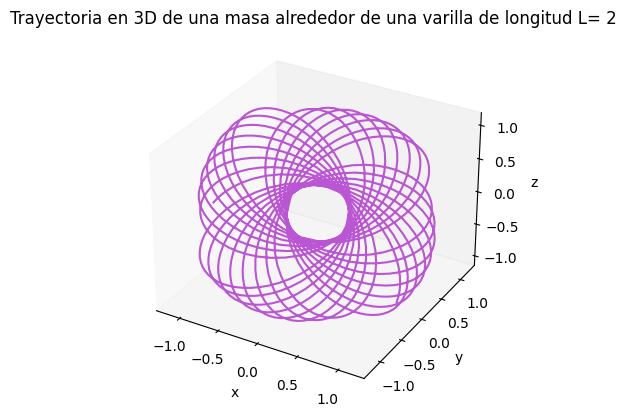

In [4]:
#Resolvemos las 3 edos de segundo orden (6 de primer orden)
G =1 #constante de newton
M= 10 #en kg
L= 2 #en m

def f(t, u):
  '''
  Define el sistema de 6 EDOs de primer orden.

  Entradas:
    - t: float
    - u: array
  Salida:
    - Derivadas del vector u
  '''
  x, y, z, vx, vy, vz = u
  r = np.sqrt(x**2 + y**2 + z**2)

  factor = -G*M / (r**2 * np.sqrt(r**2 + (L**2)/4))

  dxdt = vx
  d2xdt2 = factor * x
  dydt = vy
  d2ydt2 = factor * y
  dzdt = vz
  d2zdt2 = factor * z

  return [dxdt, dydt, dzdt, d2xdt2, d2ydt2, d2zdt2]

#Condiciones iniciales (x0, y0, z0, vx0, vy0, vz0)
u0 = [1, 0, -1, 0, 1, 1]

#Rango de tiempo
t_span = [0, 50]
t_eval = np.linspace(0, 50, 1000)

#Resolver EDOs
sol = solve_ivp(f, t_span, u0, t_eval=t_eval)

#Graficar trayectoria en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], color="mediumorchid")  # usar posiciones x, y, z
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(f"Trayectoria en 3D de una masa alrededor de una varilla de longitud L= {L}")
ax.grid(False)
plt.show()

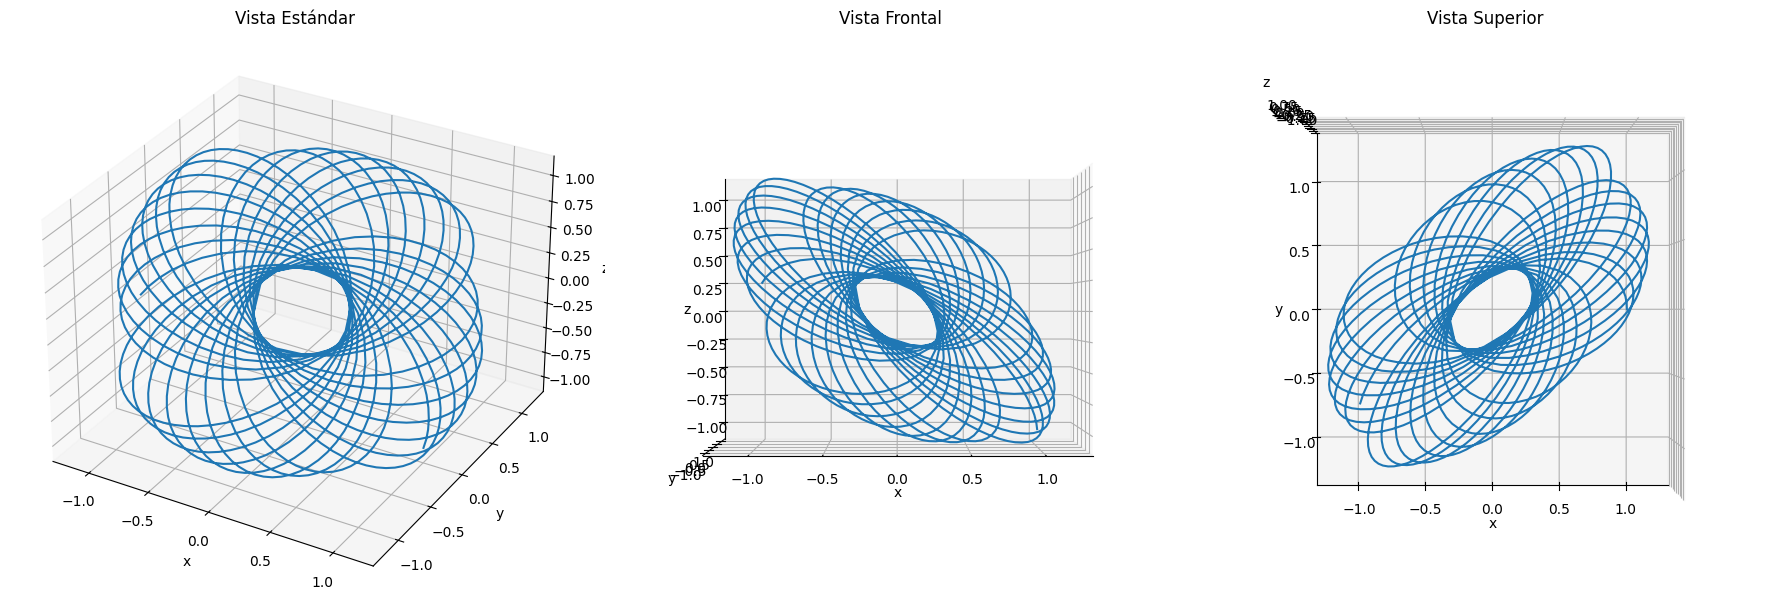

In [5]:
fig = plt.figure(figsize=(18, 6))

#Subplot 1: Vista estándar (elev=30, azim=-60)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot(sol.y[0], sol.y[1], sol.y[2])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_title("Vista Estándar")
ax1.view_init(elev=30, azim=-60)
ax1.grid(True)

#Subplot 2: Vista desde el "frente" (elev=0, azim=-90)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot(sol.y[0], sol.y[1], sol.y[2])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_title("Vista Frontal")
ax2.view_init(elev=0, azim=-90)
ax2.grid(True)

#Subplot 3: Vista desde "arriba" (elev=90, azim=-90)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot(sol.y[0], sol.y[1], sol.y[2])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
ax3.set_title("Vista Superior")
ax3.view_init(elev=90, azim=-90)
ax3.grid(True)

plt.tight_layout()
plt.show()

Ingrese las condiciones iniciales de la partícula:(valores entre [-1,1])
Posición inicial en x: 0.5
Posición inicial en y: 0.75
Posición inicial en z: -0.25
Velocidad inicial en vx: 1
Velocidad inicial en vy: 0.5
Velocidad inicial en vz: 0.8


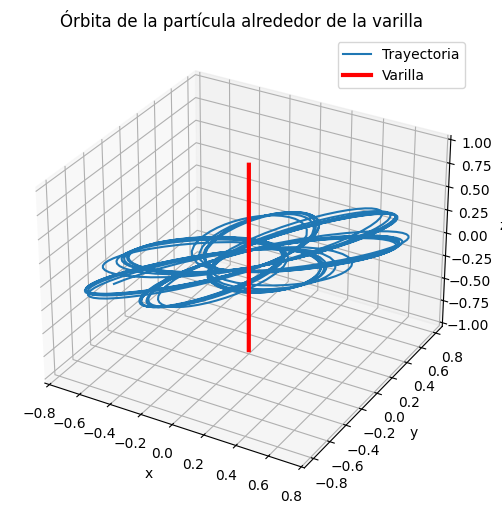

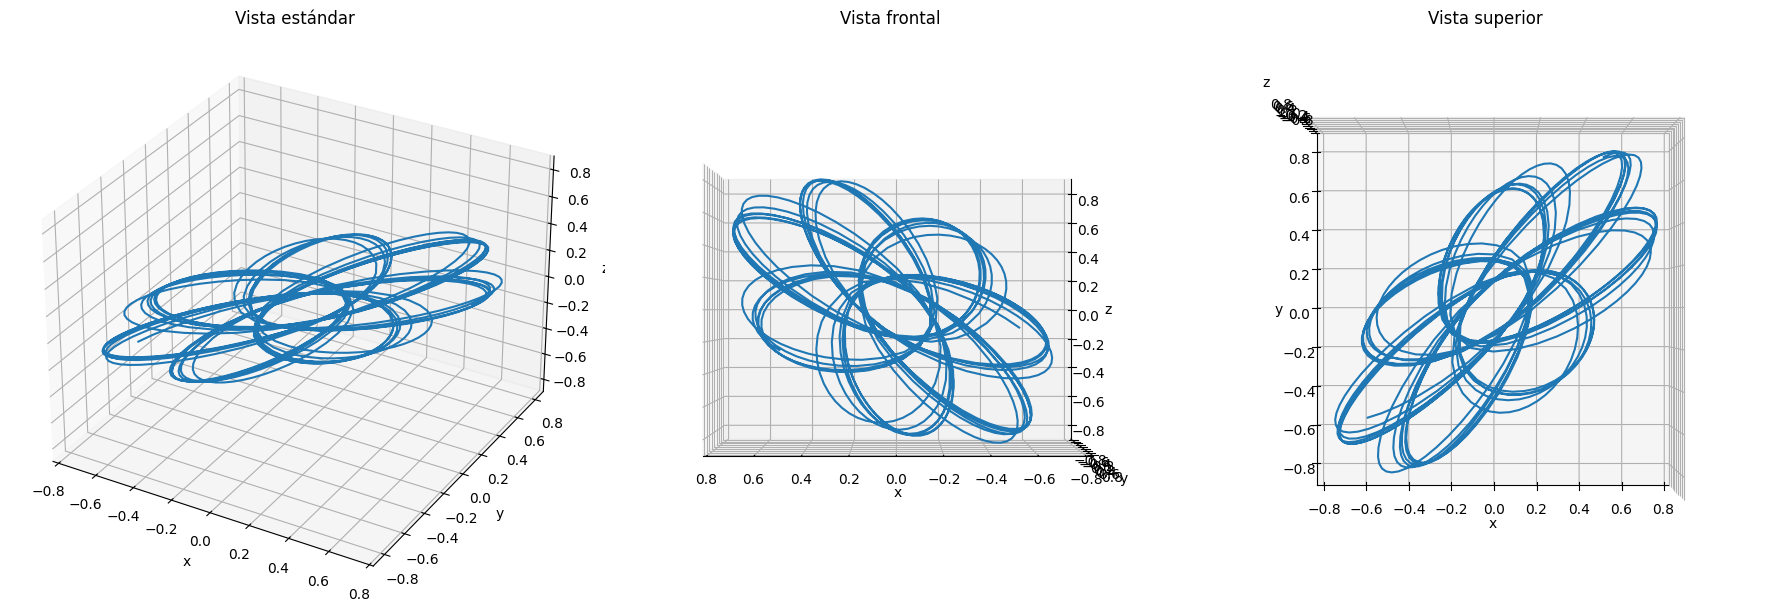

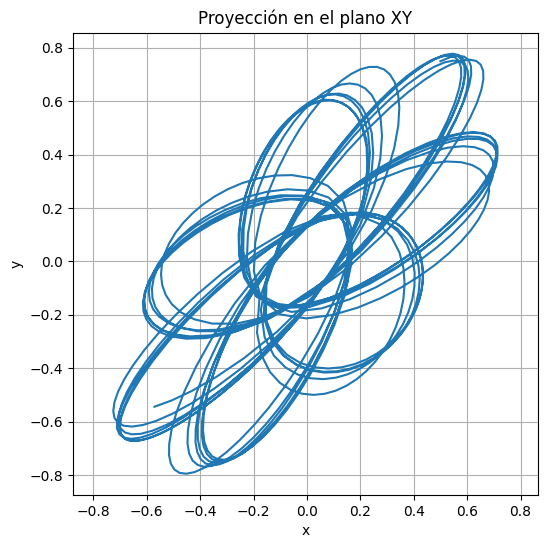

In [9]:
#Código que le pide al usario que ingrese las condiciones iniciales (x0, y0, z0, vx0, vy0, vz0)
G = 1
M = 10
L = 2

def f(t, u):
    '''
    Sistema de EDOs para partícula orbitando una varilla
    Entradas:
        t: tiempo
        u: vector [x, y, z, vx, vy, vz]
    Salida:
        derivadas [dx/dt, dy/dt, dz/dt, dvx/dt, dvy/dt, dvz/dt]
    '''
    x, y, z, vx, vy, vz = u
    r2 = x**2 + y**2 + z**2
    r = np.sqrt(r2)
    factor = -G * M / (r2 * np.sqrt(r2 + (L**2) / 4))

    dxdt = vx
    dydt = vy
    dzdt = vz
    d2xdt2 = factor * x
    d2ydt2 = factor * y
    d2zdt2 = factor * z

    return [dxdt, dydt, dzdt, d2xdt2, d2ydt2, d2zdt2]

#Le pedimos al usuario que ingrese las condiciones iniciales
print("Ingrese las condiciones iniciales de la partícula:(valores entre [-1,1])")
x0 = float(input("Posición inicial en x: "))
y0 = float(input("Posición inicial en y: "))
z0 = float(input("Posición inicial en z: "))
vx0 = float(input("Velocidad inicial en vx: "))
vy0 = float(input("Velocidad inicial en vy: "))
vz0 = float(input("Velocidad inicial en vz: "))

u0 = [x0, y0, z0, vx0, vy0, vz0]


#Resolver EDOs
t_span = [0, 40]
t_eval = np.linspace(0, 40, 1000)
sol = solve_ivp(f, t_span, u0, t_eval=t_eval)

#Ttrayectoria 3D
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(sol.y[0], sol.y[1], sol.y[2], label="Trayectoria")
ax.plot([0, 0], [0, 0], [-L/2, L/2], color="red", linewidth=3, label="Varilla")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Órbita de la partícula alrededor de la varilla")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18, 6))

#Vista estándar 3d
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.plot(sol.y[0], sol.y[1], sol.y[2])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_title("Vista estándar")
ax1.view_init(elev=30, azim=-60)

#Vista frontal
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax2.plot(sol.y[0], sol.y[1], sol.y[2])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_title("Vista frontal")
ax2.view_init(elev=0, azim=90)

#Vista superior
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
ax3.plot(sol.y[0], sol.y[1], sol.y[2])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
ax3.set_title("Vista superior")
ax3.view_init(elev=90, azim=-90)

plt.tight_layout()
plt.show()

#Grafica 2D
plt.figure(figsize=(6,6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Proyección en el plano XY")
plt.axis("equal")
plt.grid()
plt.show()



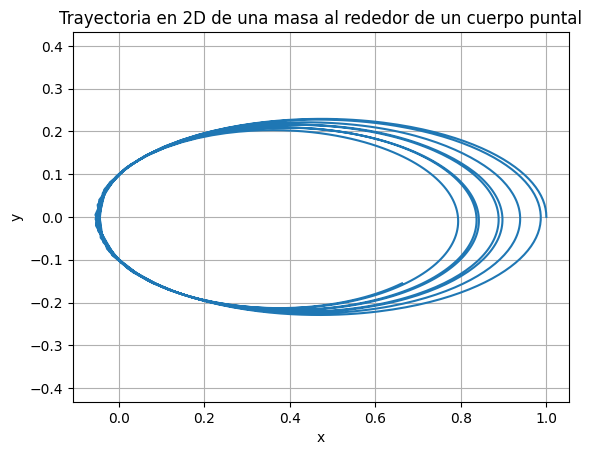

In [7]:
0.#Caso para un cuerpo puntual, es decir L=0, modelo clásico de kepler

G = 1
M = 10
L = 0

def f(t, u):
  x, y, vx, vy = u
  r_2 = x**2 + y**2
  r = np.sqrt(r_2)
  denominador = r_2 * np.sqrt(r_2 + (L**2)/4)

  dxdt = vx
  dydt = vy
  d2xdt2 = -G*M * (x / denominador)
  d2ydt2 = -G*M * (y / denominador)

  return [dxdt, dydt, d2xdt2, d2ydt2]

u0 = [1, 0, 0, 1]

t_span = [0, 5]
t_eval = np.linspace(0, 5, 1000)

sol = solve_ivp(f, t_span, u0, t_eval=t_eval)

# Graficamos x vs y
plt.plot(sol.y[0], sol.y[1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria en 2D de una masa al rededor de un cuerpo puntal")
plt.axis('equal')
plt.grid()
plt.show()

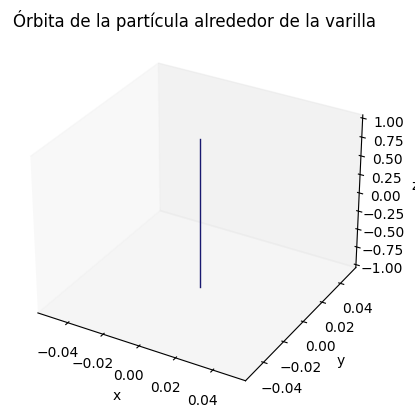

In [10]:
nframes=100
def animate(frame):
  ax.clear()
  ax.plot([0, 0], [0, 0], [-L/2, L/2], color="midnightblue", linewidth=1, label="Varilla")
  ax.plot(sol.y[0][:frame], sol.y[1][:frame],sol.y[2][:frame], color = "mediumorchid")
  ax.set_title(f"Órbita de la partícula alrededor de la varilla")
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")
  ax.grid(False)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
anim=FuncAnimation(fig, animate, frames=len(sol.t), interval=30)
anim.save("Grafica 4.mp4")